## Outliers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("C:\\Users\\devnext\\Documents\\outlierexample01.csv")

In [ ]:
df.head(20)

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


### Method 01:- Outlier detection Using Scatter Plot

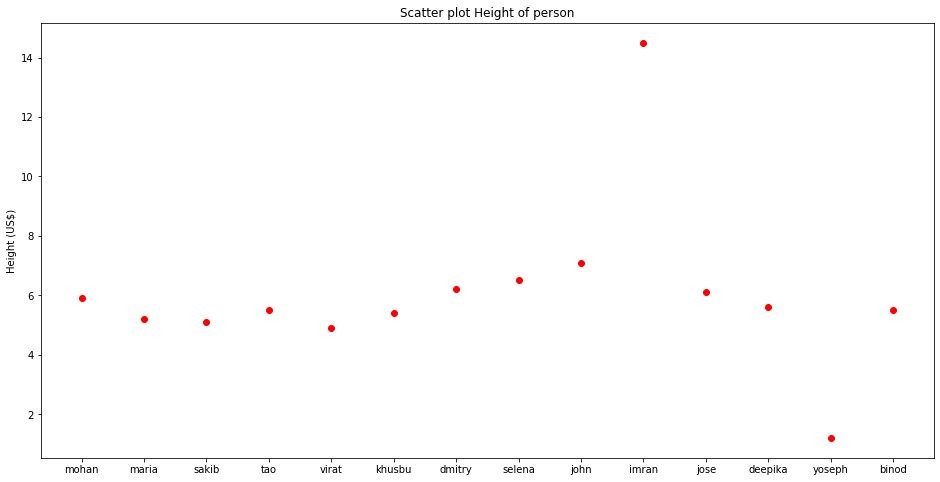

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Scatter plot Height of person')
#plt.xlabel("name")
plt.ylabel("Height (US$)")
plt.scatter(df.name,df.height,color='red')

#### From teh above scatter ploat we can see "Imran" and "yoseph" are complete outliers in this dataset.

###  Method02:- Outlier Detection Using Box plot

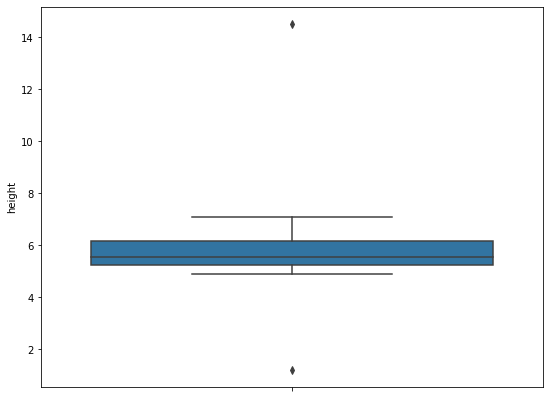

In [ ]:
plt.figure(figsize=(9,7))
sns.boxplot(y='height',data=df)

### Method 03:- Detect outliers using percentile

In [ ]:
df.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99])
# After 0.95 percentile we see huge spike hence it's outlier this needs to be removed also less than 0.05 data also has huge 
# difference hence it should be considered as outliers.

min_thresold,max_thresold = df['height'].quantile([0.05,0.95])
#Dropping the outliers
df=df[(df['height']<max_thresold) & (df['height']>min_thresold)]

In [ ]:
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
10,jose,6.1
11,deepika,5.6
13,binod,5.5


### Method 04:- Outlier detection and removal using z-score and standard deviation in python pandas

In [ ]:
df01=pd.read_csv("C:\\Users\\devnext\\Downloads\\weight-height.csv")

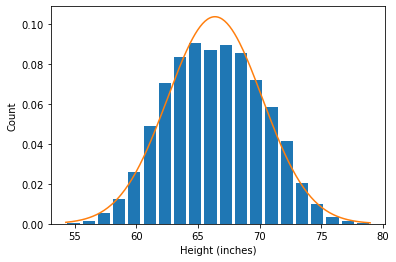

In [ ]:
from scipy.stats import norm
import numpy as np
plt.hist(df01.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df01.Height.min(), df01.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df01.Height.mean(),df01.Height.std()))

In [ ]:
print("Height is:- ",df01.Height.mean())
print("Standard deviation is:-",df01.Height.std())

Height is:-  66.36755975482106
Standard deviation is:- 3.847528120773233


## Outlier detection and removal using 3 standard deviation

### 
One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bound


In [ ]:
upper_limit = df01.Height.mean() + 3*df01.Height.std()
upper_limit
lower_limit = df01.Height.mean() -3*df01.Height.std()
lower_limit

54.82497539250136

In [ ]:
df01[(df01.Height>upper_limit) | (df01.Height<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [ ]:
df_no_outlier_std_dev = df01[(df01.Height<upper_limit) & (df01.Height>lower_limit)]
df_no_outlier_std_dev.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df_no_outlier_std_dev.shape

(9993, 3)

## Using Z score

In [ ]:
df01['zscore'] = ( df01.Height - df01.Height.mean() ) / df01.Height.std()
df_no_outliers = df01[(df01.zscore>-3) & (df01.zscore<3)]
df_no_outliers.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [ ]:
#plt.boxplot(df01.Height)
df_outlier=df01[['Height']]

Q1 = df_outlier.quantile(0.25)
Q3 = df_outlier.quantile(0.75)
IQR = Q3 - Q1



df02=((df_outlier >= (Q1 - 1.5 * IQR)) & (df_outlier <= (Q3 + 1.5 * IQR)))
df02.shape


(10000, 1)